# 990 Data Examples

We'll use this notebook to show and visualize some basic statistics involving 990 data.  We'll use seaborn as opposed to matplotlib for visualizations.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

Loading data into pandas dataframe.

In [2]:
df = pd.read_csv('data.csv')
df.columns

Index(['name', 'url', 'version', 'ein', 'founded', 'mission', 'board',
       'employees', 'volunteers', 'has_new_program', 'has_change_program',
       'has_political', 'has_lobbying', 'has_endowment',
       'has_independent_audit', 'has_school', 'has_foreign', 'has_gaming',
       'has_hospital', 'has_grants_organizations', 'has_grants_individuals',
       'has_terminated', 'has_liquidated', 'contributions_revenue',
       'program_revenue', 'investment_revenue', 'other_revenue',
       'total_revenue', 'federated_campaigns_revenue', 'fundraising_revenue',
       'grants_revenue', 'other_contribution_revenue', 'grant_expense',
       'member_expense', 'salaries_expense', 'prof_fundraising_expense',
       'total_fundraising_expense', 'other_expense', 'total_expense',
       'program_expense', 'officer_salaries_expense',
       'nonofficer_salaries_expense', 'benefits_expense', 'legal_expense',
       'accounting_expense', 'travel_expense', 'advertising_expense',
       'office_expen

First consider a histogram showing number of board members across organizations. The histogram below is roughly what you'd expect. You can also see the slight preference to having a board with an odd number of members to avoid tied votes.  

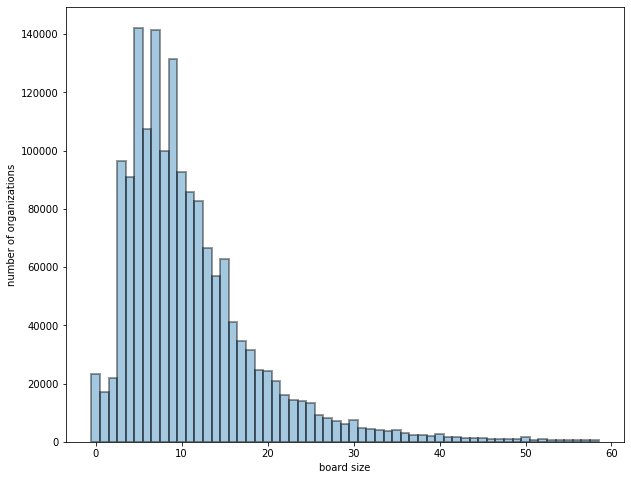

In [16]:
# changing default plot size
plt.rcParams['figure.figsize'] = [10, 8]

xmax = 60
sns.distplot(df['board'], bins= -.5 + np.arange(xmax), kde=False,
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('board size')
plt.ylabel('number of organizations');

Now let's look at another discrete-ish variable, the year in which an organization was founded.

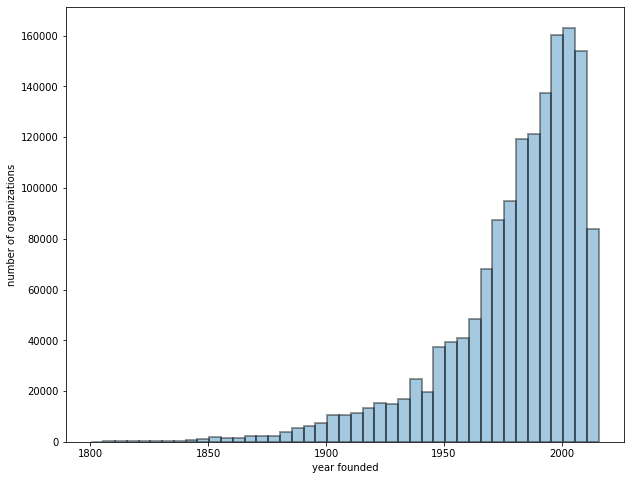

In [11]:
sns.distplot(df['founded'], bins=.5 + np.arange(1800, 2020, 5), kde=False,
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('year founded')
plt.ylabel('number of organizations');

Putting these two histograms together to form a heatmap. We can clearly see that more recently formed organizations have smaller board sizes. This is expected because new organizations have had less time to grow and balloon.

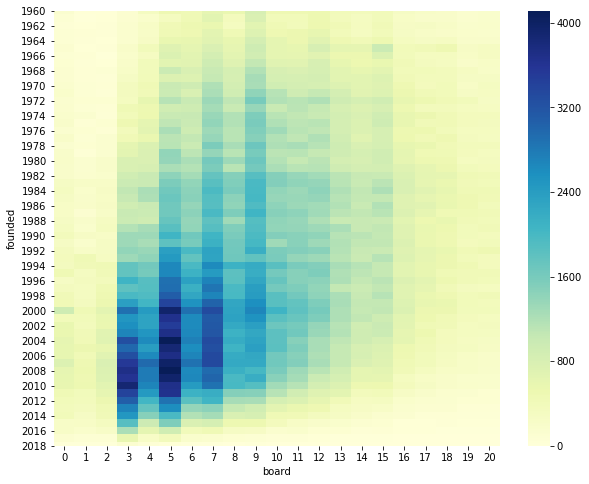

In [12]:
d = df[['board', 'founded']]
d = d[d['board'].between(0, 20) & d['founded'].between(1960, 2020)]
table = pd.crosstab(d['founded'], d['board'])
sns.heatmap(table, cmap="YlGnBu");

We can already see that many organizations have typos and mistakes on their tax forms. We expect the following dataframe to be empty if the tax forms were errorless.

In [13]:
print(df[df['founded'] > 2020].shape)
df[df['founded'] > 2020].head()

(52, 76)


,name,url,version,ein,founded,mission,board,employees,volunteers,has_new_program,...,current_endowment,minus1_endowment,minus2_endowment,minus3_endowment,minus4_endowment,percent_board_endowment,percent_permanent_endowment,percent_temporary_endowment,officers,highest_comp
12934,BROWN COUNTY 4-H FEDERATION,https://s3.amazonaws.com/irs-form-990/20111046...,2009,411353540,9999,THE MISSION OF MN 4-H YOUTH DEVELOPMENT IS TO ...,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,"[['BOSTON PORTNER', 0], ['AMANDA JENSEN', 0], ...",0
44968,CHEYENNE COUNTY CHAMBER OF COMMERCE,https://s3.amazonaws.com/irs-form-990/20110136...,2010,470354013,9999,Promote City of Sidney & related activities,19,3,0,0,...,0,0,0,0,0,0.0,0.0,0.0,"[['DANIELLE GEARHART', 0], ['CHRIS GAY', 0], [...",47737
63050,CALIFORNIA LABOR FEDERATION AFL-CIO,https://s3.amazonaws.com/irs-form-990/20113319...,2010,940362030,9999,THE PRIMARY PURPOSES OF THE ORGANIZATION ARE T...,45,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,"[['SUSAN SACHEN', 99585], ['ART PULASKI', 1363...",136307
81693,FIREFIGHTERS RELIEF ASSOCIATION OF PARSONS KANSAS,https://s3.amazonaws.com/irs-form-990/20111089...,2010,486115730,9999,TO PROVIDE RELIEF TO INJURED OR DISABLED FIREF...,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,"[['BRAD BOSS', 0], ['TOM JACKSON', 0], ['MATT ...",0
84920,NORFOLK COLLEGIATE EDUCATIONAL FOUNDATION INC,https://s3.amazonaws.com/irs-form-990/20113042...,2009,541893594,9999,Fundraising for providing scholarship assistan...,5,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,"[['Betsy Mason', 0], ['Henry U Harris III', 0]...",0


We now start looking at highest compensated employees. There is one issue that needs some cleaning up. When our `parse_data.py` module previously stored this dataframe as a csv, elements of type list were converted to strings. We see in the example below the outer quotes around the list.

In [14]:
df['officers'][14159]

"[['SUSAN KELLY', 0], ['ANN GLUMAC', 0], ['TOM DIFFLEY', 0], ['MIKE ROSEN', 0], ['ANN BARKELEW', 0], ['LISA BELAK', 0], ['ROBERT BUNGER', 0], ['AIMME DAYHOFF', 0], ['SARA EVAN', 0], ['JENNIFER FORBES', 0], ['WILLIAM FRIERT', 0], ['HOWARD GUTHMANN', 0], ['JOHN HARRINGTON', 0], ['SUSAN HEEGAARD', 0], ['DIANE HERMAN', 0], ['CARINDA HORTON', 0], ['JEREMY KOVASH', 0], ['MARGARET LIEBFRIED', 0], ['CAROL MCGEE JOHNSON', 0], ['E JANE OLIVE', 0], ['MERYLL PAGE', 0], ['JAMES PETERSON', 0], ['MARK PETERSON', 0], ['JAVIER SANCHEZ', 0], ['JO-ANNE STATELY', 0], ['NANCY STRAW', 0], ['KATHLEEN MICHAELSON', 66677], ['STANLEY ROMANSTEIN', 162238]]"

To convert this datapoint back to a list, we use an eval function. There are dangers to using python's built-in `eval` function, so we use `ast.literal_eval`. The function below pulls out the highest compensation of an organization. We make a new column in our dataframe to hold this data. The cell below takes a minute to run. Using `np.vectorize` is not any faster for this function, so we use `pd.apply` since we can see a status bar using the `tqdm` module.

In [8]:
from ast import literal_eval
from tqdm import tqdm

def highest_comp(officers):
    """Extract the highest compensation among the officers."""
    
    officers = literal_eval(officers)
    if officers == []:  # sometimes there are no officers
        return 0
    officers.sort(key=lambda x: x[1], reverse=True)
    return officers[0][1]

tqdm.pandas()
df['highest_comp'] = df['officers'].progress_apply(highest_comp)

/Users/robotics/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1674119/1674119 [02:39<00:00, 10498.14it/s]


Now a simple scatter plot with highest compensation plotted against total revenue. We use a log-log scaling to make in linear.

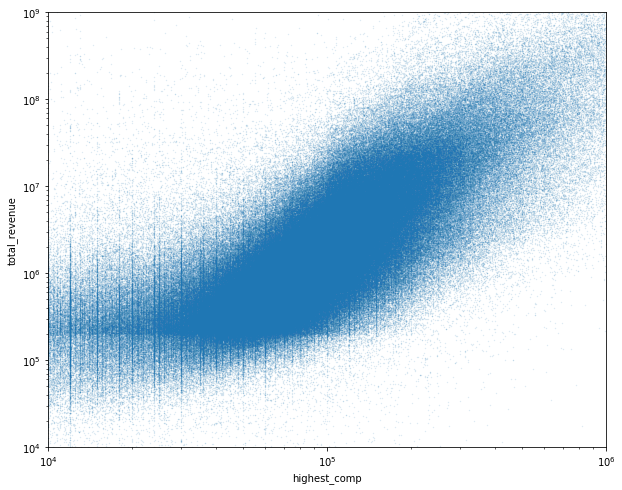

In [48]:
splot = sns.regplot(x='highest_comp', y='total_revenue', data=df,
                    fit_reg=False, scatter_kws={'s': .1, 'alpha': .2})
splot.set(xscale='log', yscale='log')

# Setting x and y limits to avoid the crazy outliers.
# Run, for example, df['highest_comp'].nlargest(20) to see 20 highest compensations.
plt.ylim(10**4, 10**9)
plt.xlim(10**4, 10**6);

This is interesting. When plotted on this log-log scale, we clearly see a positive trend. This is expected. A larger organization would have a higher total revenue and compensate their CEO with a higher salary.

More than that, the trend may not be perfectly linear; instead, we can imagine the curve of best fit as a slightly concave-up function. This is also somewhat intuitive: we expect the highest salaries at a nonprofit organization to not exceed 6 figures regardless of the growth and size of the organization. We would not necessarily expect this to be the case with a for-profit organization.

There is one more feature to point out. Notice that there is an obvious threshold within the total revenue data starting at \\$200k. With revenues under $200k, an organization could file a 990-EZ tax form. These are not included in our dataset.

Now we'll look at data just from schools and hospitals.

In [65]:
schools = df[df['has_school'] == 1]
hospitals = df[df['has_hospital'] == 1]
schools.shape, hospitals.shape

((89485, 76), (20209, 76))

Looking at highest compensation. Many organizations list no officer with compensation, so start at \\$1.

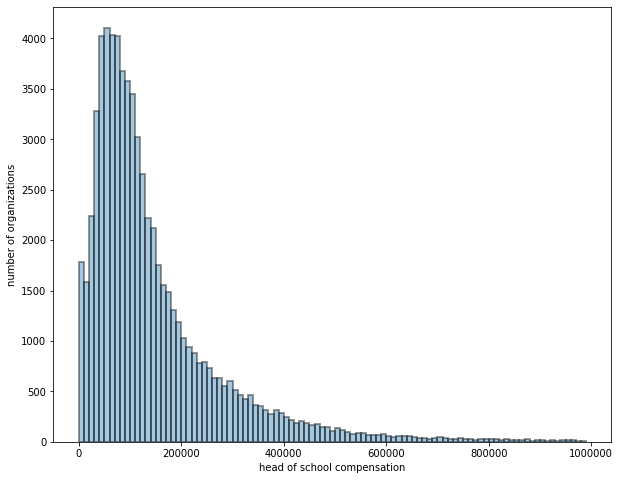

In [67]:
sns.distplot(schools['highest_comp'], bins=1 + np.arange(0, 10**6, 10**4),
             kde=False, hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('head of school compensation')
plt.ylabel('number of organizations');

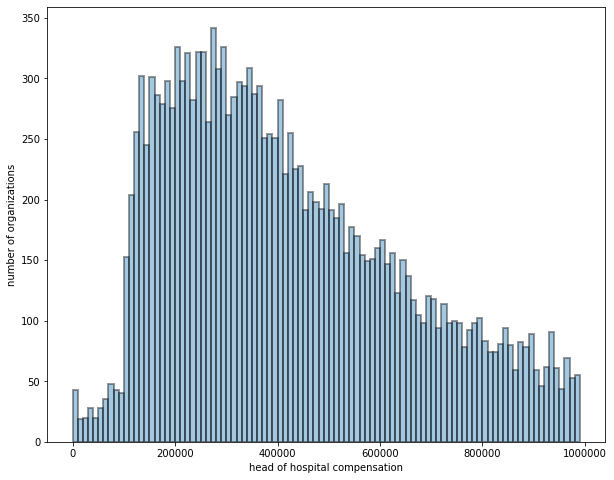

In [68]:
sns.distplot(hospitals['highest_comp'], bins=1 + np.arange(0, 10**6, 10**4),
             kde=False, hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('head of hospital compensation')
plt.ylabel('number of organizations');

We see very different histogram distributions. Hospital CEO pay dwarfs that of a head of school.

TODO: track an organization temporally overtime
      make scatterplot in similar to one above in which we color organization types with color